In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim

from torchvision import transforms, datasets
from torchvision.utils import save_image

import matplotlib.pyplot as plt
import numpy as np

In [2]:
EPOCHS = 500
BATCH_SIZE = 100
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print("Device: ", DEVICE)

Device:  cuda


In [3]:
# Fashion MNIST
trainset = datasets.FashionMNIST('./.data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))]))
train_loader = torch.utils.data.DataLoader(dataset = trainset, batch_size = BATCH_SIZE, shuffle = True)

In [4]:
# Generator
G = nn.Sequential(
        nn.Linear(64, 256),
        nn.ReLU(),
        nn.Linear(256, 256),
        nn.ReLU(),
        nn.Linear(256, 784),
        nn.Tanh())

In [5]:
# Discriminator
D = nn.Sequential(
        nn.Linear(784, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 1),
        nn.Sigmoid())

In [6]:
D = D.to(DEVICE)
G = G.to(DEVICE)

criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr = 0.0002)
g_optimizer = optim.Adam(G.parameters(), lr = 0.0002)

In [7]:
total_step = len(train_loader)
for epoch in range(EPOCHS):
    for i, (images, _) in enumerate(train_loader):
        images = images.reshape(BATCH_SIZE, -1).to(DEVICE)
        
        real_labels = torch.ones(BATCH_SIZE, 1).to(DEVICE)
        fake_labels = torch.zeros(BATCH_SIZE, 1).to(DEVICE)
        
        outputs = D(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        
        # Latent Variables
        z = torch.randn(BATCH_SIZE, 64).to(DEVICE)
        fake_images = G(z)
        
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        
        d_loss = d_loss_real + d_loss_fake
        
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        fake_images = G(z)
        outputs = D(fake_images)
        g_loss = criterion(outputs, real_labels)
        
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
    
    print("Epoch [{}/{}], D_Loss: {:.4f}, G_Loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}".format(epoch, EPOCHS, d_loss.item(), g_loss.item(), real_score.mean().item(), fake_score.mean().item()))

Epoch [0/500], D_Loss: 0.0561, G_Loss: 4.7172, D(x): 0.98, D(G(z)): 0.03
Epoch [1/500], D_Loss: 0.0544, G_Loss: 5.2950, D(x): 0.98, D(G(z)): 0.02
Epoch [2/500], D_Loss: 0.0284, G_Loss: 6.5161, D(x): 0.98, D(G(z)): 0.00
Epoch [3/500], D_Loss: 0.1867, G_Loss: 5.3928, D(x): 0.98, D(G(z)): 0.14
Epoch [4/500], D_Loss: 0.0680, G_Loss: 7.0205, D(x): 0.98, D(G(z)): 0.02
Epoch [5/500], D_Loss: 0.1534, G_Loss: 6.9384, D(x): 0.95, D(G(z)): 0.01
Epoch [6/500], D_Loss: 0.1097, G_Loss: 6.2545, D(x): 0.96, D(G(z)): 0.02
Epoch [7/500], D_Loss: 0.1578, G_Loss: 5.9684, D(x): 0.93, D(G(z)): 0.01
Epoch [8/500], D_Loss: 0.0691, G_Loss: 5.8630, D(x): 0.98, D(G(z)): 0.01
Epoch [9/500], D_Loss: 0.1058, G_Loss: 5.6580, D(x): 0.98, D(G(z)): 0.07
Epoch [10/500], D_Loss: 0.1791, G_Loss: 4.3173, D(x): 0.96, D(G(z)): 0.11
Epoch [11/500], D_Loss: 0.1549, G_Loss: 5.9408, D(x): 0.96, D(G(z)): 0.05
Epoch [12/500], D_Loss: 0.3377, G_Loss: 4.9969, D(x): 0.92, D(G(z)): 0.05
Epoch [13/500], D_Loss: 0.2507, G_Loss: 4.1379, 

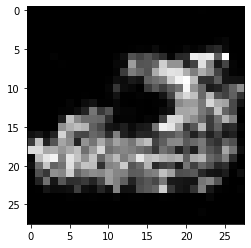

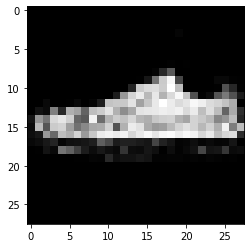

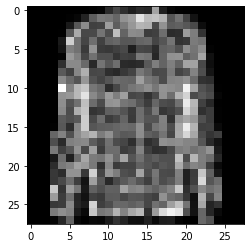

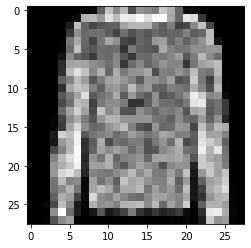

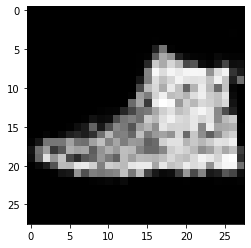

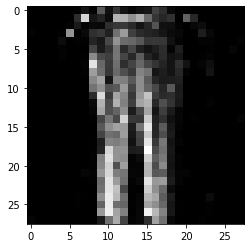

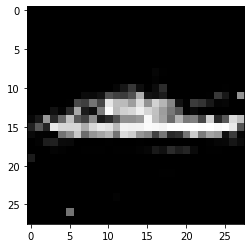

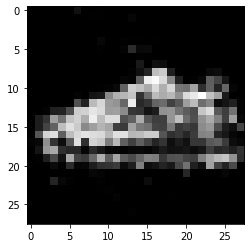

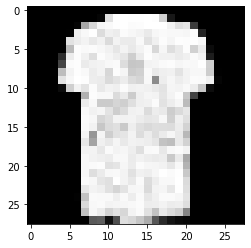

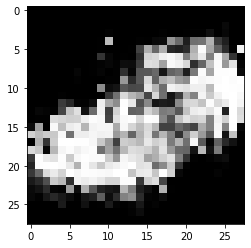

In [9]:
z = torch.randn(BATCH_SIZE, 64).to(DEVICE)
fake_images = G(z)
for i in range(10):
    fake_images_img = np.reshape(fake_images.data.cpu().numpy()[i], (28, 28))
    plt.imshow(fake_images_img, cmap = 'gray')
    plt.show()